<a href="https://colab.research.google.com/github/Nithyakotha/cartonizedimage/blob/main/cartonizeimagemlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARTONIZE IMAGE USING **ML**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Loading image
def read_file(filename):
  img=cv2.imread(filename)
  plt.imshow(img)
  plt.show()
  return img

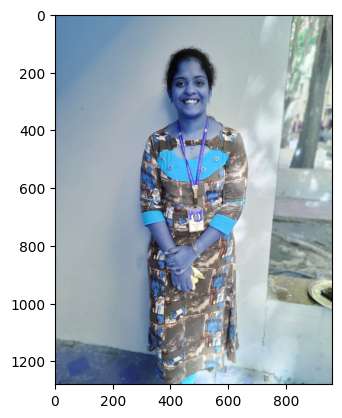

In [ ]:
filename ="/content/Myself.jpg"
img=read_file(filename)
org_img=np.copy(img)

In [ ]:

#create edge mask
def edge_mask(img,line_size,blur_value):
  """
  input: gray scale image
  Output:Edges of image
  """
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray_blur=cv2.medianBlur(gray,blur_value)
  edges= cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
  return edges

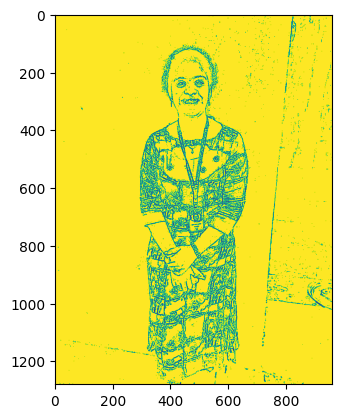

In [ ]:
line_size,blur_value=3,3
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges)
plt.show()


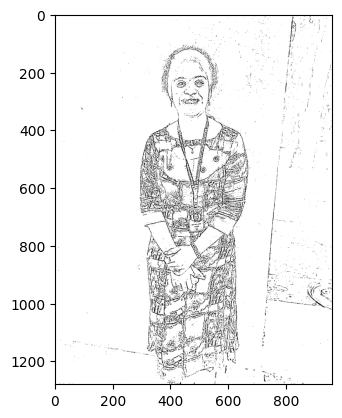

In [ ]:
line_size,blur_value=3,3
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap="gray")
plt.show()

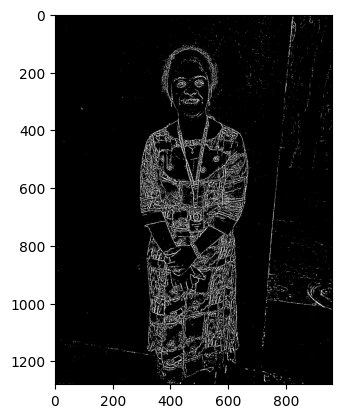

In [ ]:
line_size,blur_value=3,3
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap="binary")
plt.show()

In [ ]:
#Reducing the color pallet
def color_quantization(img,k):
  #transform the image
  data=np.float32(img).reshape((-1,3))
  #determine the criteria
  criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
  #implementing k-means
  ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center=np.uint8(center)
  result=center[label.flatten()]
  result=result.reshape(img.shape)
  return result

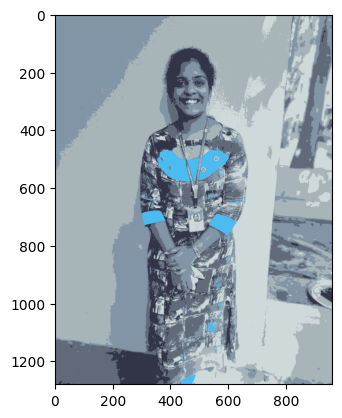

In [ ]:
img=color_quantization(img,k=6)
plt.imshow(img)
plt.show()

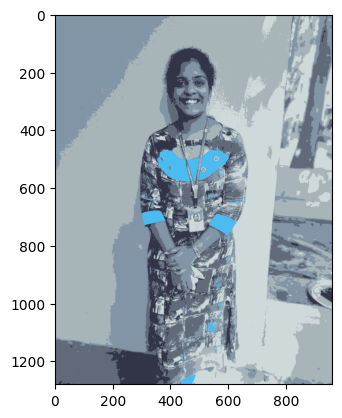

In [ ]:
img_quantiz=color_quantization(img,k=9)
plt.imshow(img)
plt.show()

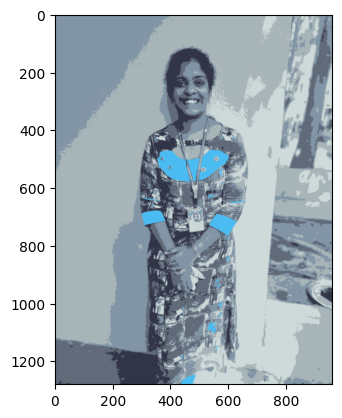

In [ ]:
#reduce the noise
blurred=cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [ ]:
#combine edge mask with quantiz img
def cartoon():
  c=cv2.bitwise_and(blurred,blurred,mask=edges)
  plt.imshow(c)
  plt.title("Cartoonified Image")
  plt.show()
  plt.imshow(org_img)
  plt.title("original image")
  plt.show()

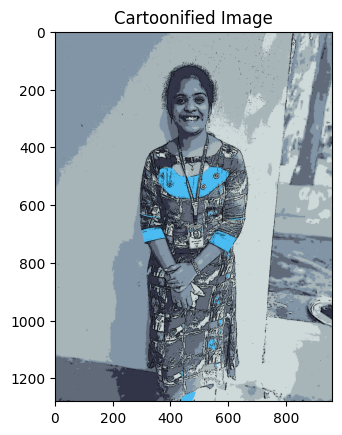

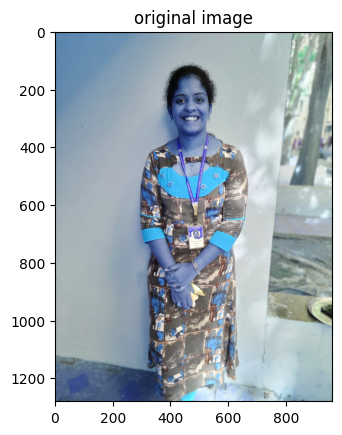

In [ ]:
cartoon()